In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Data_Train.xlsx")

In [3]:
df = pd.DataFrame(df)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Performing EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.shape

(10682, 11)

In [9]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df["Journey_day"] = pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y").dt.day
df["Journey_month"] = pd.to_datetime(df["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

here we have create new columns in a dataframe out of existing column Date 

In [11]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

droped the original column Date

In [12]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

again created new columns in a dataframe but here we have created with the column departure time

In [13]:
def get_duration(x):
    x=x.split(' ')
    hours=0
    mins=0
    if len(x)==1:
        x=x[0]
        if x[-1]=='h':
            hours=int(x[:-1])
        else:
            mins=int(x[:-1])
    else:
        hours=int(x[0][:-1])
        mins=int(x[1][:-1])
    return hours,mins
df['Duration_hours']=df.Duration.apply(lambda x:get_duration(x)[0])
df['Duration_mins']=df.Duration.apply(lambda x:get_duration(x)[1])
df.drop(["Duration"], axis = 1, inplace = True)

here we have split the duration column into into two new column in dataframe with the name duration_hr and duration_min with their respective values.

In [14]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

checked the number of columns inside the data frame

In [15]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


here we have checked the first 5 rows from the dataframe

[Text(0, 0, '3'), Text(1, 0, '4'), Text(2, 0, '5'), Text(3, 0, '6')]

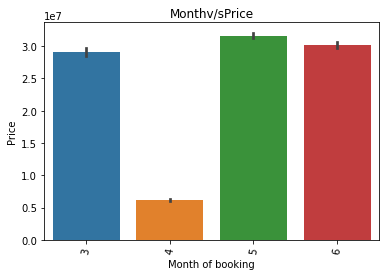

In [18]:
#Journey month v/s total fare
v1=sns.barplot(x='Journey_month', y='Price', data=df,estimator=sum)
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

In [20]:
#count of flights per month
top_month=df.Journey_month.value_counts().head(10)
top_month

5    3465
6    3414
3    2724
4    1079
Name: Journey_month, dtype: int64



*   We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May
*   This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time


*   The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter 1






<function matplotlib.pyplot.show(close=None, block=None)>

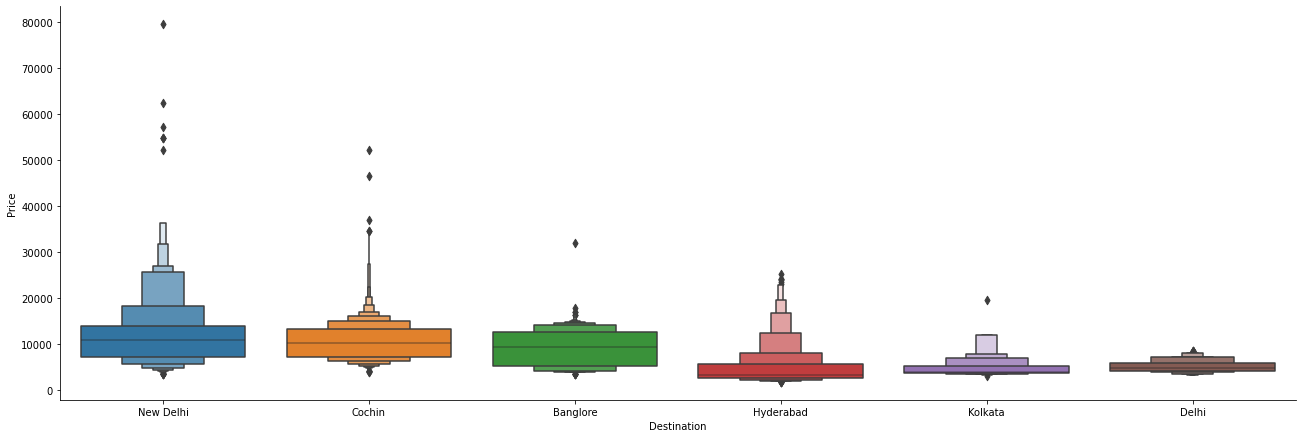

In [21]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)

<function matplotlib.pyplot.show(close=None, block=None)>

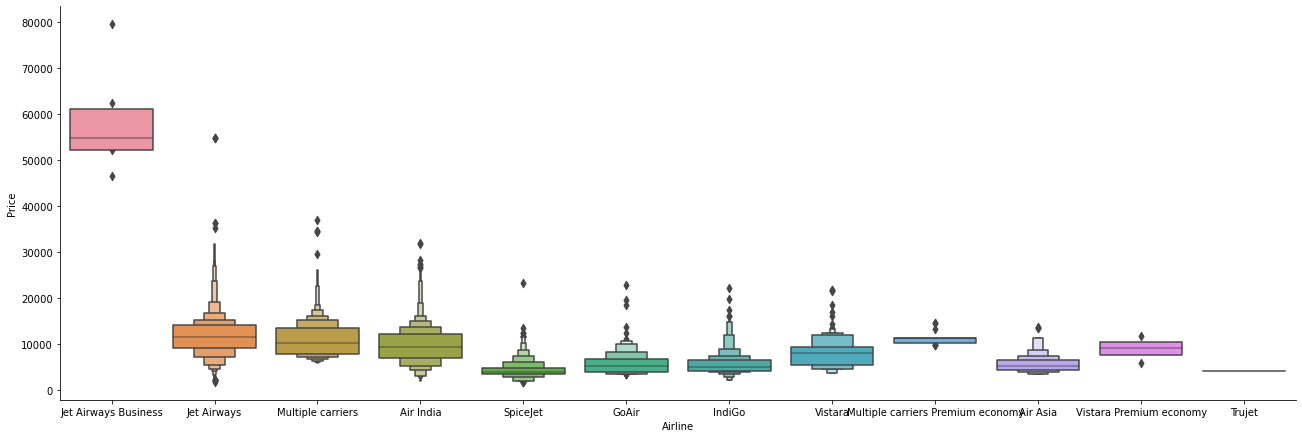

In [22]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

In [23]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

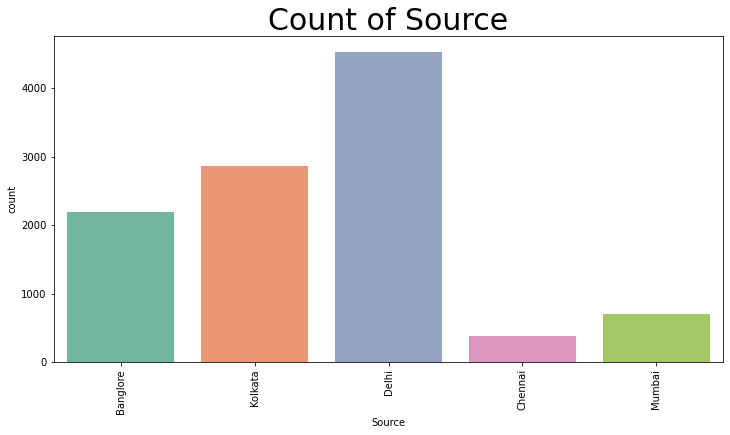

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Count of Source', size=30)
plt.xticks(rotation=90)
plt.show()

we can observe from the graph that from delhi airport the maximum number of flights are rinning and 2nd is kolkata and 3rd from banglore.

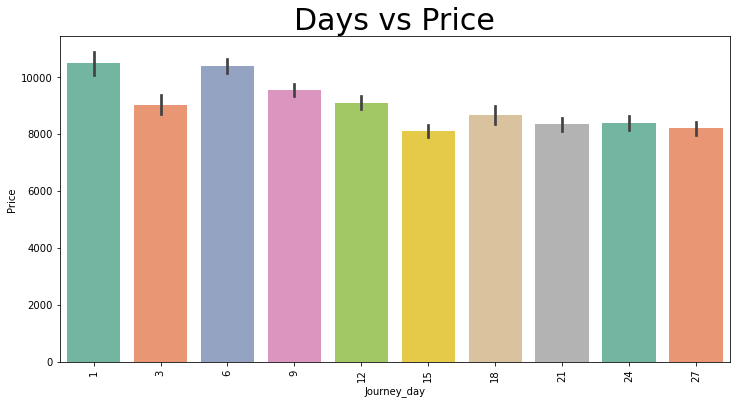

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(df['Journey_day'], df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

from the above graph we can observe that the journey which takes a day has the highest price and price descrease as the flight takes long days

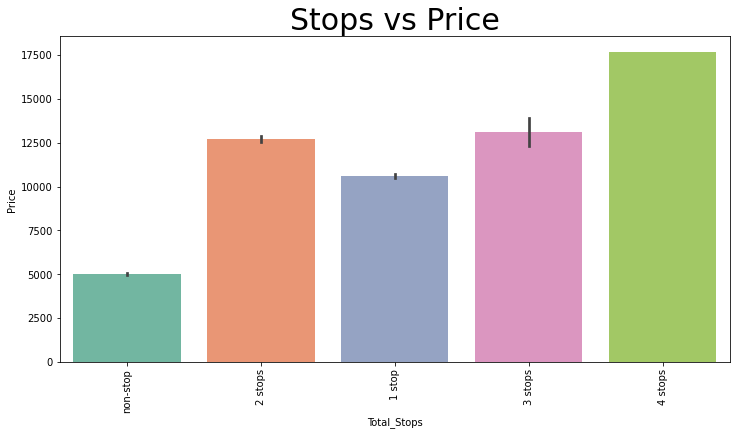

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(df['Total_Stops'], df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

from the above graph we can observe that the flights which have more stops charges more price and which are non-stops flights charges less price.

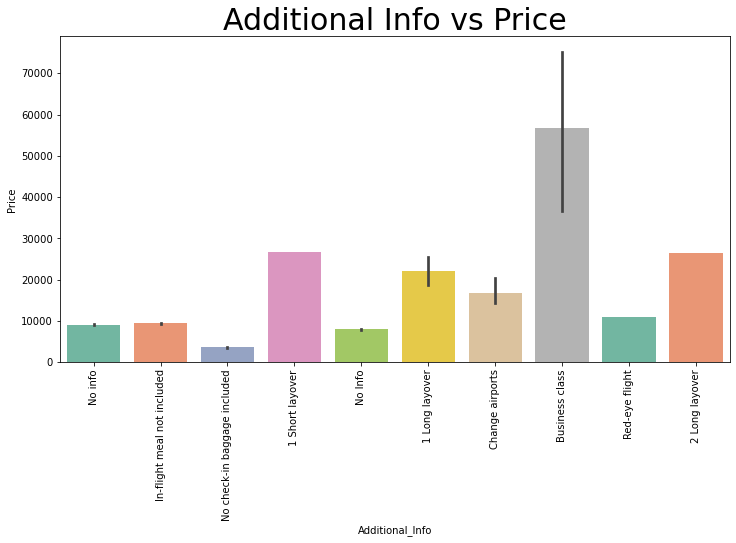

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(df['Additional_Info'], df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

from the above graph we cam observe that business class flights charges highest price and other classes have less prices.

## Preprocessing

In [29]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [30]:
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)

One-Hot encoded ‘Airline’ data is saved in the Airline variable as shown in the above code.

In [31]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

One-Hot encoded ‘Source’ data is saved in the Airline variable as shown in the above code

In [32]:
df.drop(["Route"], axis = 1, inplace = True)

droping the route column

In [33]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [34]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

replacing the string into repective integer

In [35]:
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [36]:
df['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

In [37]:
Add_info = df[["Additional_Info"]]
Add_info = pd.get_dummies(Add_info, drop_first = True)

One-Hot encoded ‘Add_info’ data is saved in the Airline variable as shown in the above code

In [38]:
df = pd.concat([df, Airline, Source, Destination,Add_info], axis = 1)
df.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

creating new dataframe

In [39]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,1,0,0
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,0,1,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,0,0,0,0,0,1,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,0,0,0,0,1,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,1,0,0,0,0,0,1,0,0


In [40]:
df.shape

(10682, 38)

checking out the shape of new dataframe

## Plotting the outliers

Total_Stops                                        AxesSubplot(0.125,0.799681;0.133621x0.0803191)
Price                                           AxesSubplot(0.285345,0.799681;0.133621x0.0803191)
Journey_day                                      AxesSubplot(0.44569,0.799681;0.133621x0.0803191)
Journey_month                                   AxesSubplot(0.606034,0.799681;0.133621x0.0803191)
Dep_hour                                        AxesSubplot(0.766379,0.799681;0.133621x0.0803191)
Dep_min                                            AxesSubplot(0.125,0.703298;0.133621x0.0803191)
Arrival_hour                                    AxesSubplot(0.285345,0.703298;0.133621x0.0803191)
Arrival_min                                      AxesSubplot(0.44569,0.703298;0.133621x0.0803191)
Duration_hours                                  AxesSubplot(0.606034,0.703298;0.133621x0.0803191)
Duration_mins                                   AxesSubplot(0.766379,0.703298;0.133621x0.0803191)
Airline_Air India   

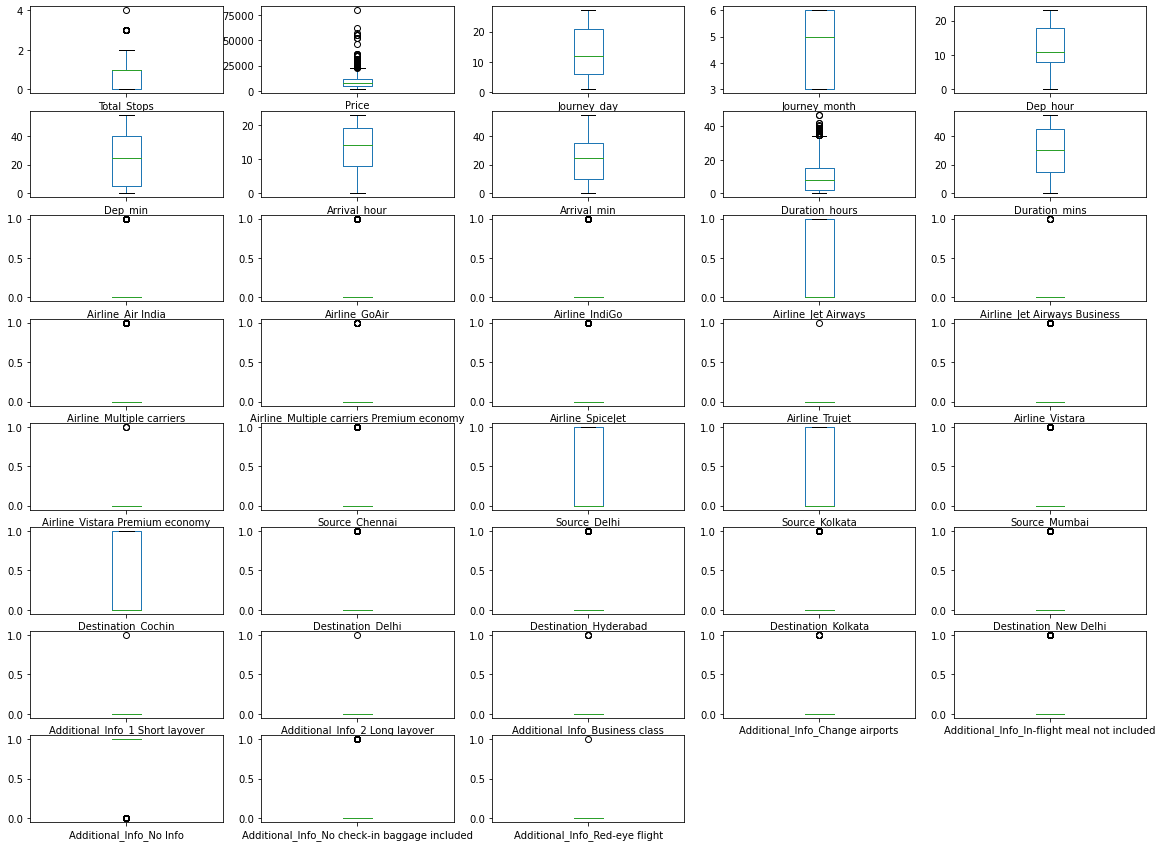

In [41]:
df.plot(kind = 'box',subplots = True,layout=(8,5),figsize = (20,15))

# Removing outliers

In [42]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

array([[1.22066609, 1.12553455, 1.23728754, ..., 0.52890569, 0.17573295,
        0.00967596],
       [1.74143186, 0.30906781, 1.47530729, ..., 0.52890569, 0.17573295,
        0.00967596],
       [1.74143186, 1.03978296, 0.53179604, ..., 0.52890569, 0.17573295,
        0.00967596],
       ...,
       [1.22066609, 0.40296691, 1.59110426, ..., 0.52890569, 0.17573295,
        0.00967596],
       [1.22066609, 0.77218138, 1.47530729, ..., 0.52890569, 0.17573295,
        0.00967596],
       [1.74143186, 0.57809433, 0.53179604, ..., 0.52890569, 0.17573295,
        0.00967596]])

In [43]:
df_new = df[(z<3).all(axis = 1)]
print(df_new.shape)
print(df.shape)

(7506, 38)
(10682, 38)


here we have removed the outliers

In [44]:
df_new.skew()

Total_Stops                                     0.018956
Price                                           0.208493
Journey_day                                     0.116840
Journey_month                                  -0.696326
Dep_hour                                        0.055054
Dep_min                                         0.241643
Arrival_hour                                   -0.407626
Arrival_min                                     0.181814
Duration_hours                                  0.566488
Duration_mins                                  -0.102010
Airline_Air India                               1.704413
Airline_GoAir                                   0.000000
Airline_IndiGo                                  1.484977
Airline_Jet Airways                             0.302418
Airline_Jet Airways Business                    0.000000
Airline_Multiple carriers                       1.886636
Airline_Multiple carriers Premium economy       0.000000
Airline_SpiceJet               

In [45]:
skew = ['Additional_Info_In-flight meal not included','Destination_Delhi','Airline_Multiple carriers','Airline_Air India']
for col in skew:
    if df_new.skew().loc[col]>0.055:
        df_new[col] = np.log1p(df_new[col])

here we have removed the skewness

# Model Building

In [46]:
x=df_new.drop('Price',axis=1)
y=df_new['Price']

spliting the data into dependent and independent variable

In [47]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

scaling the independent variable

In [48]:
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 42)

In [49]:
#!pip install xgboost

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [51]:
lr = LinearRegression()
rfc = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()

model = [lr,rfc,dt,xg]

for i in model:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    print('training score: ',i,'is',i.score(x_train,y_train))
    print('testing score: ',i,'is',i.score(x_test,y_test))
    
    # The mean squared error
    print("Mean squared error: ",i,'is',mean_squared_error(y_test,pred))
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: ",i,'is', r2_score(y_test,pred))
    # report performance
    
    
    print('\n')

training score:  LinearRegression() is 0.663328969524642
testing score:  LinearRegression() is 0.6522632903270018
Mean squared error:  LinearRegression() is 4835397.288386815
Coefficient of determination:  LinearRegression() is 0.6522632903270018


training score:  RandomForestRegressor() is 0.9833441985053456
testing score:  RandomForestRegressor() is 0.927839353299167
Mean squared error:  RandomForestRegressor() is 1003418.3498013959
Coefficient of determination:  RandomForestRegressor() is 0.927839353299167


training score:  DecisionTreeRegressor() is 0.99184545140895
testing score:  DecisionTreeRegressor() is 0.8864117032769774
Mean squared error:  DecisionTreeRegressor() is 1579483.9218541945
Coefficient of determination:  DecisionTreeRegressor() is 0.8864117032769774


training score:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=

Looks like RandomForest model is working good so we move ahead with Randomforest

## Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['squared_error','absolute_error', 'poisson'],
              'n_estimators': [10,30,50,70,90,100,120,140,150,160,180,200,210],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [5,10,15,20,25,30,35,40,45,50]}
rfr= RandomForestRegressor()
clf = GridSearchCV(estimator = rfr,param_grid = parameters)
clf.fit(x_train,y_train)
clf.best_params_

{'criterion': 'poisson',
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 90}

In [58]:
rfr2 = RandomForestRegressor(criterion = 'poisson',
                            max_features = 'sqrt',
                            min_samples_leaf = 1,
                            n_estimators = 100)
rfr2.fit(x_train,y_train)
print(rfr2.score(x_train,y_train))
print(rfr2.score(x_test,y_test))

0.9762836113865554
0.8765786620820308


In [61]:
pred_final = rfr2.predict(x_test)

Text(0, 0.5, 'Predicted')

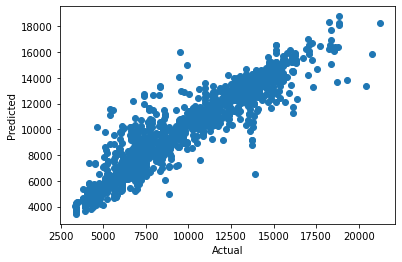

In [63]:
# checking out the differnce between actual and predicted values
plt.scatter(x = y_test,y = pred_final)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
import pickle
filename = 'Flight_price_predict.pkl'
pickle.dump(rfr3,open(filename,'wb'))